In [267]:
import IPython, graphviz, re
from io import StringIO
from IPython.display import Image
import numpy as np
import pandas as pd
import math
from sklearn import tree
from sklearn.datasets import load_boston, load_iris, load_wine, load_breast_cancer
from collections import defaultdict
import string
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# inspired by Mark Needham's blog
# https://markhneedham.com/blog/2017/09/23/python-3-create-sparklines-using-matplotlib/

#def sparkline(data, filename, fill=False, figsize=(4, 0.25), **kwags):
"""
Save a sparkline image
"""

boston = load_boston()

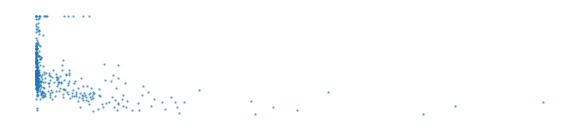

In [3]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,0], target, s=2, alpha=.5)
# ax.scatter(data[:,1], target, s=2)
# ax.scatter(data[:,2], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

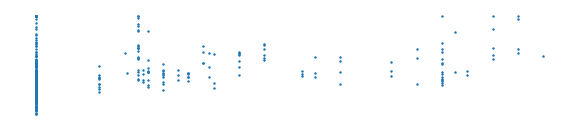

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,1], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

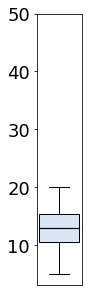

In [5]:
y = np.array([16.2, 18., 14.3, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14., 14.4, 13.4, 15.6
, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 19.4, 17., 15.6, 13.1, 17.8, 16.8, 13.8, 13.8
, 13.9, 13.3, 13.1, 10.2, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1
, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5., 6.3, 5.6, 7.2, 12.1, 8.3, 8.5
, 5., 11.9, 7., 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 13.4, 8.3, 10.9, 11.
, 9.5, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8
, 14.9, 12.6, 14.1, 13., 13.4, 15.2, 16.1, 14.9, 14.1, 12.7, 13.5, 14.9, 20., 16.4
, 17.7, 19., 16.7, 12., 14.6, 15.2, 7., 8.1, 13.6])

fig, ax = plt.subplots(1, 1, figsize=(.8,5))
ax.xaxis.set_visible(False)
ax.set_xticks([])
#ax.set_xlim(0,.2)

y_range = (3,50)
ax.set_ylim(y_range)
ax.tick_params(axis='both', which='major', labelsize=18)
meanprops = {'linewidth':1.2,'linestyle':'-','color':'black'}
bp =ax.boxplot(y, notch=False, medianprops={'linewidth':0}, meanprops=meanprops,
           widths=[.9], showmeans=True, meanline=True, sym='', patch_artist=True)
BLUE = "#D9E6F5"
YELLOW = "#fefecd"
for patch in bp['boxes']:
    patch.set(facecolor=BLUE)       
plt.show()

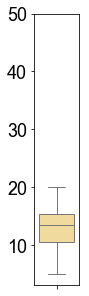

In [6]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(.8,5))
sns.set(style="white")
ax.set_ylim(3,50)
#ax.set_ylim('', fontsize=28, fontname="Arial)
#plt.xticks(fontsize=38)
plt.tick_params(axis='both', which='major', labelsize=18)
ax = sns.boxplot(y=y, color='#fee090', ax=ax, linewidth=1, sym='')

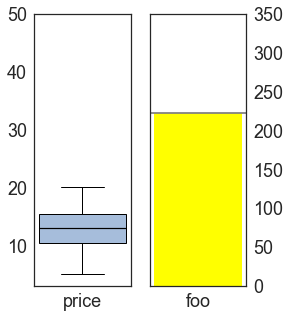

In [7]:
y = np.array([16.2, 18., 14.3, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14., 14.4, 13.4, 15.6
, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 19.4, 17., 15.6, 13.1, 17.8, 16.8, 13.8, 13.8
, 13.9, 13.3, 13.1, 10.2, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1
, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5., 6.3, 5.6, 7.2, 12.1, 8.3, 8.5
, 5., 11.9, 7., 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 13.4, 8.3, 10.9, 11.
, 9.5, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8
, 14.9, 12.6, 14.1, 13., 13.4, 15.2, 16.1, 14.9, 14.1, 12.7, 13.5, 14.9, 20., 16.4
, 17.7, 19., 16.7, 12., 14.6, 15.2, 7., 8.1, 13.6])

fig, axes = plt.subplots(1, 2, figsize=(3.8,5))
plt.subplots_adjust(wspace=.2)
ax0 = axes[0]
#ax0.xaxis.set_visible(False)
#ax0.set_xlabel("price", fontsize=18)
ax0.set_xticklabels(['ss','abc'])
#ax0.set_xticks([3], minor=True)

y_range = (3,50)
ax0.set_ylim(y_range)
ax0.tick_params(axis='both', which='major', labelsize=18)
meanprops = {'linewidth':1.2,'linestyle':'-','color':'black'}
bp =ax0.boxplot(y, notch=False,
                medianprops={'linewidth':0}, 
                meanprops=meanprops,
                widths=[.9],
                showmeans=True,
                meanline=True,
                sym='',
                labels=["price"],
                patch_artist=True)

BLUE = "#D9E6F5"
YELLOW = "#fefecd"
for patch in bp['boxes']:
    patch.set(facecolor='#a6bddb')       
    
ax1 = axes[1]
#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(['foo'])
# ax1.set_xticklabels(['ff'], minor=False)
#ax1.set_xlabel("n", fontsize=18)
ax1.yaxis.tick_right()
ax1.set_ylim(0,350)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.bar(0,223,color='yellow',tick_label='foo', linewidth=0)
ax1.axhline(223, color="grey")
plt.show()

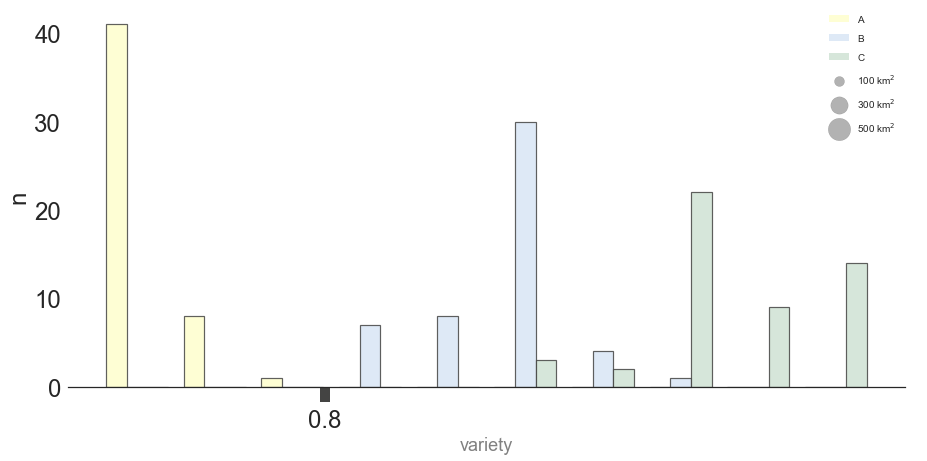

In [8]:
from animl.trees import *

precision = 1
GREY = '#444443'

iris = load_iris()
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=666)
clf = clf.fit(data, iris.target)

YELLOW = "#fefecd" # "#fbfbd0" # "#FBFEB0"
BLUE = "#D9E6F5"
GREEN = "#cfe2d4"
DARKBLUE = '#313695'
DARKGREEN = '#006400'
LIGHTORANGE = '#fee090'
LIGHTBLUE = '#a6bddb'
GREY = '#444443'
dark_colors = [DARKBLUE, DARKGREEN, '#a50026', '#fdae61', '#c51b7d', '#fee090']
mycolors = [YELLOW,BLUE,GREEN]

class_names=["setosa", "versicolor", "virginica"]
shadow_tree = ShadowDecTree(clf, data, iris.target,
                            feature_names=iris.feature_names, 
                            class_names=class_names)

node = shadow_tree.root
    
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_xlabel(f"variety", fontsize=18, fontname="Arial",
              color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

n_classes = 3
class_names = ['A','B','C']

X = iris.data
y = iris.target
X = X[:,node.feature()]
X, y = X[node.samples()], y[node.samples()]

X_hist = [X[y==cl] for cl in range(n_classes)]

binwidth = 30
hist,bins,barcontainers = ax.hist(X_hist,
              color=mycolors,
               #bins=np.arange(min(X), max(X) + binwidth , binwidth),
               label=class_names,
               linewidth=3,
              alpha=.85)
#ax.legend(prop={'size': 18})

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, labelspacing=1)

for patch in barcontainers:
    for rect in patch.patches:
#         rect.linestyle='solid'
        rect.set_linewidth(1.2)
        rect.set_edgecolor(GREY)
    
#    print(patch)
#    patch.set(facecolor='#a6bddb')   
    
ax.set_xticks([round(node.split(),precision)])
ax.set_ylabel("n", fontsize=24)
ax.tick_params(axis='x', direction='out', length=15, width=10, color=GREY,
               labelsize=24)
ax.tick_params(axis='y', color=GREY, labelsize=24)
plt.show()

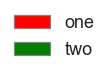

In [9]:
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
from matplotlib.transforms import Bbox
from matplotlib.figure import figaspect


box1 = patches.Rectangle((0, 0), 20, 10, linewidth=1.2, edgecolor='grey',
                         facecolor='red', label='one')
#ax.add_patch(box1)
box2 = patches.Rectangle((0, 0), 0, 0, linewidth=1.2, edgecolor='grey',
                         facecolor='green', label='two')


fs = figaspect(1/3)
fs = (1,1)
fig, ax = plt.subplots(1, 1, figsize=fs)
ax.legend(handles=[box1,box2],
               frameon=False,
                loc='center',
#          bbox_to_anchor=(0.0, 0.0),
                edgecolor='grey',
         fontsize=18)

ax.set_xlim(0,20)
ax.set_ylim(0,10)
ax.axis('off')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.tight_layout()

plt.savefig("/tmp/legend.svg", bbox_inches='tight', pad_inches=0)

plt.show()

In [10]:
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
from matplotlib.transforms import Bbox
from matplotlib.figure import figaspect

fs = (1,1)
fig, ax = plt.subplots(1, 1, figsize=(1,.6))
box1 = patches.Rectangle((0, 0), 2, 1, linewidth=1.2, edgecolor='grey',
                         facecolor='red', label='one')
ax.add_patch(box1)

ax.set_xlim(0,2)
ax.set_ylim(0,1)
ax.axis('off')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.tight_layout()

plt.savefig("/tmp/legend.svg", bbox_inches='tight', pad_inches=0)

plt.show()

In [11]:
X_hist

[array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2]),
 array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
        1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
        1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
        1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3]),
 array([2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1,
        2. , 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8,
        1.8, 1.8, 2.1, 1.6, 1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8,
        2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])]

[(0.1, 0.6), (1.0, 1.8), (1.4, 2.5)]
(0.1, 0.6)
50
(1.0, 1.8)
50
(1.4, 2.5)
50


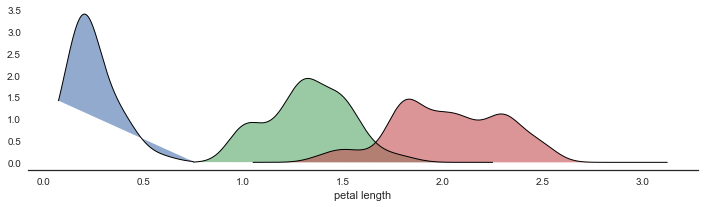

In [279]:
from scipy import stats
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots(1, 1, figsize=(12,3))
X = iris.data
y = iris.target
n_cols = X.shape[1]
X_hist = [X[y==cl] for cl in range(n_classes)]

i_splitvar = 3

ranges = [(np.min(X_hist[cl][:,i_splitvar]),np.max(X_hist[cl][:,i_splitvar])) for cl in range(n_classes)]
print(ranges)

for cl in range(n_classes):
    r=ranges[cl]
    print(r)
    X = X_hist[cl][:,i_splitvar]
    x_grid = np.linspace(r[0]-r[0]*.25, r[1]*1.25, 1000)
    if False:
        kernel = stats.gaussian_kde(X)
        heights = kernel.evaluate(x_grid)
    n = len(X)
    d = 1
    print(n)
    bw = n**(-1./(3))
    bw = (n * (d + 2) / 4.)**(-1. / (d + 4))
    bw /= 6
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X.reshape(-1, 1))
    log_dens = kde.score_samples(x_grid.reshape(-1, 1))
    heights = np.exp(log_dens)
#     print(heights)
    plt.plot(x_grid, heights, linewidth=1, c='black')
    plt.fill(x_grid, heights, alpha=.6)
#    plt.ylim(0.0,3)


x = 2.5
xaxis_y = bbox.y0

#tria = np.array([[x,xaxis_y],[x-10,xaxis_y-10],[x+10,xaxis_y-10]])
tria = np.array([[x,0],[x-.2,-.3],[x+.2,-0.3]])
t = patches.Polygon(tria, linewidth=1.2, edgecolor='orange',
                      facecolor='orange', label='foo')
t.set_clip_on(False)
ax.set_xlabel(f'petal length')
#ax.add_patch(t)
#ax.set_xticks([])
#ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2]
[1.4 1.5 1.5 1.3 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.
 1.5 1.1 1.8 1.3 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6
 1.5 1.3 1.3 1.3 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3]
[2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2
 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3
 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3 2.5 2.3 1.9 2.  2.3 1.8]


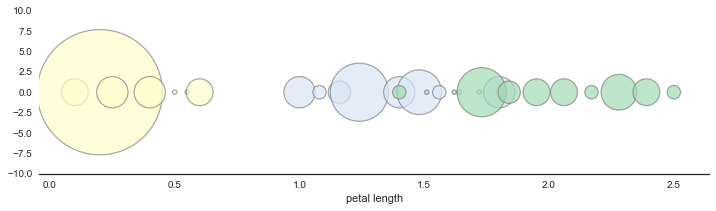

In [278]:
from scipy import stats
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots(1, 1, figsize=(12,3))
X = iris.data
y = iris.target
n_cols = X.shape[1]
X_hist = [X[y==cl] for cl in range(n_classes)]

i_splitvar = 3

ranges = [(np.min(X_hist[cl][:,i_splitvar]),np.max(X_hist[cl][:,i_splitvar])) for cl in range(n_classes)]


colors = ["#fefecd","#D9E6F5",'#a1dab4']

for cl in range(n_classes):
    X = X_hist[cl][:,i_splitvar]
    hist, bin_edges = np.histogram(X, density=False)
#     print(hist, bin_edges)
    print(X)
#     plt.scatter(X, [0]*len(X), s=50, alpha=.1, c=colors[cl], linewidth=.5, edgecolor='grey')
    plt.scatter(bin_edges, [0]*len(bin_edges), s=hist**2*20, alpha=.7, c=colors[cl], linewidth=1.2, edgecolor='grey')

x = 2.5
xaxis_y = bbox.y0
ax.set_ylim(-10,10)
#tria = np.array([[x,xaxis_y],[x-10,xaxis_y-10],[x+10,xaxis_y-10]])
tria = np.array([[x,0],[x-.2,-.3],[x+.2,-0.3]])
t = patches.Polygon(tria, linewidth=1.2, edgecolor='orange',
                      facecolor='orange', label='foo')
t.set_clip_on(False)
ax.set_xlabel(f'petal length')
#ax.add_patch(t)
#ax.set_xticks([])
#ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

Wedge(center=(0, 0), r=1, theta1=0, theta2=246.575, width=None)
Wedge(center=(0, 0), r=1, theta1=246.575, theta2=266.301, width=None)
Wedge(center=(0, 0), r=1, theta1=266.301, theta2=266.301, width=None)
Wedge(center=(0, 0), r=1, theta1=266.301, theta2=360, width=None)


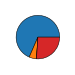

In [178]:
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
from matplotlib.transforms import Bbox
from matplotlib.figure import figaspect

size = 1
fig, ax = plt.subplots(1, 1, figsize=(size,size), subplot_kw=dict(aspect="equal"))

ratios = [50, 4, 0, 19]
#ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
patches, _ = ax.pie(ratios, radius=1, shadow=False)
for patch in patches:
    print(patch)
    patch.set_linewidth(.5)
    patch.set_edgecolor('black')

plt.show()

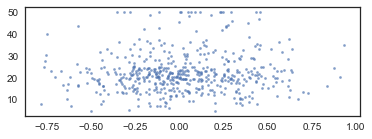

In [287]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

fig, ax = plt.subplots(1, 1, figsize=(6,2))
mu = 0
sigma=.2
x = np.random.normal(mu, sigma, size=len(target))
ax.scatter(x, target, s=5, alpha=.7)
# ax.scatter(data[:,1], target, s=2)
# ax.scatter(data[:,2], target, s=2)

plt.show()

In [289]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


limit_output extension: Maximum message size of 10000 exceeded with 19309 characters